<a href="https://colab.research.google.com/github/TurboJapuraEfac/Potato-Disease-Classification---Deep-Learning---End-to-End/blob/main/Potato_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50 # Trail and Error

In [4]:
# Here 1st we specify directory 1st
# Main directory 
# Then classes (Here our direcory is Potato Data which have sub directories)
# Image size = 256 by 256 (click image and explore)
# Batch size 32 is a standard


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Potato Data",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
# We have 2152 images but here it shows 68
# The reason is the every element in the dataset is actually a batch of 32 images
# 32 * 68 = 2176
len(dataset)

68

In [7]:
68 *32

2176

In [8]:
# When we do this it gives one batch (32 images)
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    # Here every element we get is a tensor
    # so wee need to transform it to numpy

# 32 images , size , size, RGB
# 0,1,2 labels

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


In [9]:
# Print 1st image
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[163. 161. 172.]
  [129. 127. 138.]
  [108. 106. 117.]
  ...
  [163. 161. 175.]
  [158. 156. 170.]
  [153. 151. 165.]]

 [[149. 147. 158.]
  [ 98.  96. 107.]
  [144. 142. 153.]
  ...
  [159. 157. 171.]
  [165. 163. 177.]
  [168. 166. 180.]]

 [[100.  98. 109.]
  [117. 115. 126.]
  [188. 186. 199.]
  ...
  [163. 161. 175.]
  [164. 162. 176.]
  [164. 162. 176.]]

 ...

 [[142. 138. 153.]
  [120. 116. 131.]
  [136. 132. 147.]
  ...
  [180. 178. 191.]
  [178. 176. 189.]
  [189. 187. 200.]]

 [[118. 114. 129.]
  [102.  98. 113.]
  [157. 153. 168.]
  ...
  [177. 175. 188.]
  [172. 170. 183.]
  [177. 175. 188.]]

 [[123. 119. 134.]
  [128. 124. 139.]
  [148. 144. 159.]
  ...
  [205. 203. 216.]
  [188. 186. 199.]
  [173. 171. 184.]]], shape=(256, 256, 3), dtype=float32)


In [10]:
# Convert Tensor to Numpy
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[161. 146. 151.]
  [147. 132. 137.]
  [143. 128. 133.]
  ...
  [162. 142. 151.]
  [163. 143. 152.]
  [164. 144. 153.]]

 [[146. 131. 136.]
  [147. 132. 137.]
  [145. 130. 135.]
  ...
  [163. 143. 152.]
  [164. 144. 153.]
  [165. 145. 154.]]

 [[145. 130. 135.]
  [147. 132. 137.]
  [147. 132. 137.]
  ...
  [162. 142. 151.]
  [163. 143. 152.]
  [163. 143. 152.]]

 ...

 [[180. 166. 166.]
  [182. 168. 168.]
  [182. 168. 168.]
  ...
  [174. 159. 164.]
  [171. 156. 161.]
  [169. 154. 159.]]

 [[173. 159. 159.]
  [180. 166. 166.]
  [183. 169. 169.]
  ...
  [177. 162. 167.]
  [173. 158. 163.]
  [170. 155. 160.]]

 [[160. 146. 146.]
  [172. 158. 158.]
  [179. 165. 165.]
  ...
  [178. 163. 168.]
  [175. 160. 165.]
  [172. 157. 162.]]]


In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


Visualize some of the images from our dataset

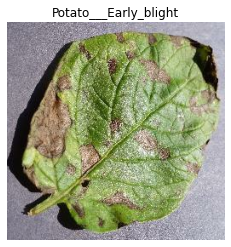

In [12]:
# Plot 1st image
# Every time we see a different image beacuse we are shuffling it
for image_batch, labels_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[labels_batch[0]])
  plt.axis("off")

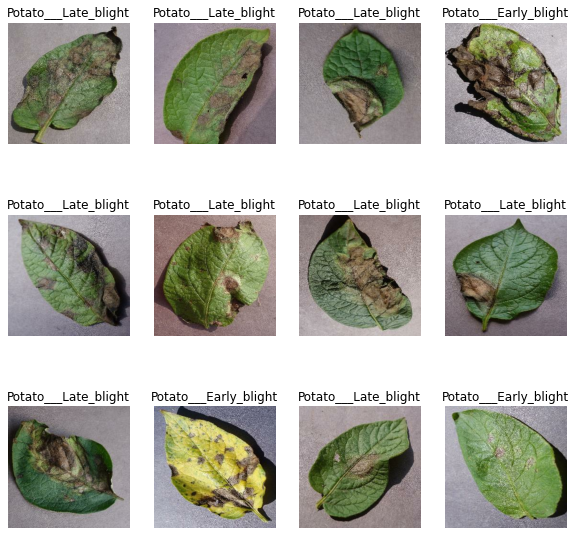

In [13]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

**Function to Split Dataset**

Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training
Validation: Dataset to be tested against while training
Test: Dataset to be tested against after we trained a model

In [14]:
len(dataset)
# Actual length 68 * 32

68

In [15]:
# 80% Training
# 10% Validation (Used during training process)
# 10% Testing
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [16]:
# Take first 54 batches =  Train data set
train_ds = dataset.take(54)
len(train_ds)

54

In [17]:
# Skip first 54  =  Reamining
test_ds = dataset.skip(54)
len(test_ds)

14

In [18]:
# Validation Dataset
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [20]:
# Test dataset
test_ds = test_ds.skip(6)
len(test_ds)

8

Train, Validation , Test split without hardcoding

In [21]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds) # Length of data size
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12) # Shuffle before train test split validation
    
    train_size = int(train_split * ds_size) # train size
    val_size = int(val_split * ds_size) # Validation size
    
    train_ds = ds.take(train_size) # like previous
    val_ds = ds.skip(train_size).take(val_size) # get reamins & get val
    test_ds = ds.skip(train_size).skip(val_size) # get remains and skip val
    
    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

54

In [24]:
len(val_ds)

6

In [25]:
len(test_ds)

8

Cache, Shuffle, and Prefetch the Dataset

In [26]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

**Building the Model**

*Creating a Layer for Resizing and Normalization*

Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. **Hence we can add that as a layer in our Sequential Model.**

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [27]:
# this resize_and_rescale layer we are creating will be a layer in our model. 
# When we have a trained model and start predicting , 
# somone can supply an image that is not (256,256) and this layer will resize it

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

**Data Augmentation**

Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data

In [28]:
# Here we make our model robust
# If we supply images which are rotated or vertical or horizontal model will not perform better
# So we use data augmentation
# In our original image we apply 
# Horizontal flip, Vertical Flip, Zoom and Contrast create 4 new sample out of that
# we will use all 5 images in the training
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

Applying Data Augmentation to Train Dataset

In [29]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

**Model Architecture**

We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation. We are going to use convolutional neural network (CNN) here. CNN is popular for image classification tasks

In [30]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,  this is used in train_ds
    # 32 layers(train and error), Filter size 3*3, Always Relu , input_shape = 256*256
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    # Here we are preserving the features and reducing the size
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'), 
])

model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

**Compiling the Model**

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
54/54 [==============================] - 156s 447ms/step - loss: 0.9198 - accuracy: 0.4734 - val_loss: 0.8961 - val_accuracy: 0.4896
Epoch 2/10
54/54 [==============================] - 18s 338ms/step - loss: 0.7802 - accuracy: 0.6071 - val_loss: 0.6728 - val_accuracy: 0.6667
Epoch 3/10
54/54 [==============================] - 18s 331ms/step - loss: 0.5335 - accuracy: 0.7512 - val_loss: 0.4818 - val_accuracy: 0.7604
Epoch 4/10
54/54 [==============================] - 18s 334ms/step - loss: 0.4314 - accuracy: 0.8166 - val_loss: 0.4553 - val_accuracy: 0.8385
Epoch 5/10
54/54 [==============================] - 19s 347ms/step - loss: 0.3665 - accuracy: 0.8501 - val_loss: 0.3070 - val_accuracy: 0.8698
Epoch 6/10
54/54 [==============================] - 18s 329ms/step - loss: 0.2981 - accuracy: 0.8895 - val_loss: 0.5368 - val_accuracy: 0.7448
Epoch 7/10
54/54 [==============================] - 18s 333ms/step - loss: 0.2326 - accuracy: 0.9039 - val_loss: 0.3378 - val_accuracy: 0.843

In [34]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 62ms/step - loss: 0.2621 - accuracy: 0.8906


In [35]:
scores

[0.2621310353279114, 0.890625]

Scores is just a list containing loss and accuracy value

**Plotting the Accuracy and Loss Curves**

In [36]:
history

In [37]:
history.params

{'epochs': 10, 'steps': 54, 'verbose': 1}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
history.history['accuracy'] # epoch values in training accuracy

[0.47337964177131653,
 0.6070601940155029,
 0.7511574029922485,
 0.8165509104728699,
 0.8501157164573669,
 0.8894675970077515,
 0.9039351940155029,
 0.9380787014961243,
 0.9172453880310059,
 0.8935185074806213]

In [41]:
type(history.history['loss'])

list

In [42]:
len(history.history['loss'])

10

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

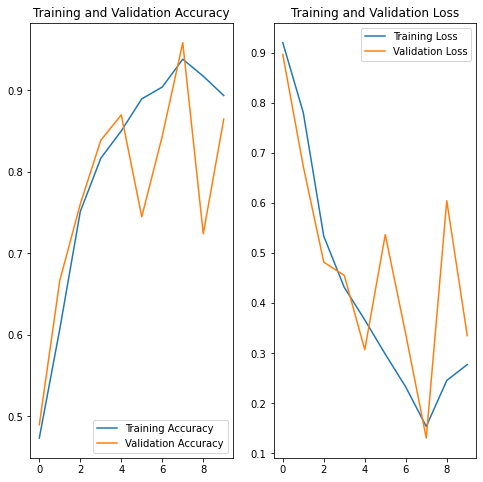

In [45]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight
[6.2805149e-05 9.9993587e-01 1.2718596e-06]
predicted label index: 1


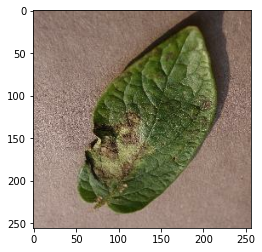

In [49]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    # Here we get a 3d array, in model we have 3 neurons with softmax 
    # np.argmax get the index of class 

    batch_prediction = model.predict(images_batch)
    print("predicted label index:",np.argmax(batch_prediction[0]))

Write a function for inference

In [52]:
# above eka function ekain dala thiyenne
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Now run inference on few sample images

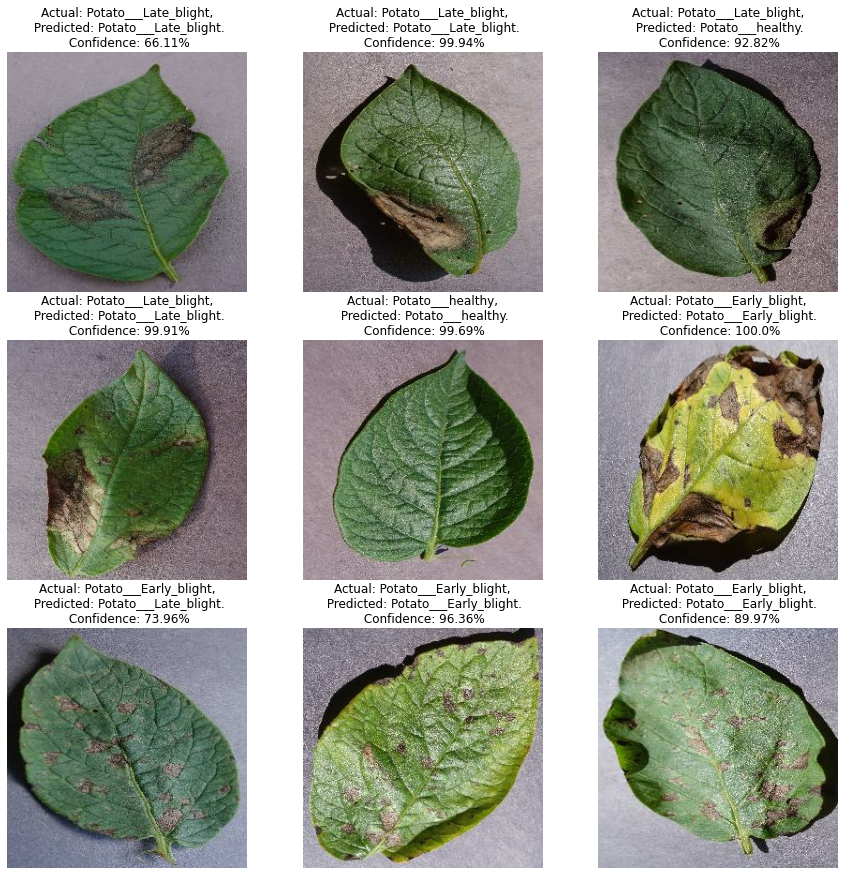

In [53]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

**Saving the Model**

In [55]:
model.save("./potatoes.h5")